# Storytelling with Starbucks Drink Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Contents<a id='Contents'></a>
* [1.0 Intoduction and data wranglight](#1.0_Introduction)
  * [1.1 Introduction](#1.1_Introduction)
  * [1.2 Import and examine data](#1.2_Import_examine_data)
  * [1.3 Investigate size](#1.3_Investigate_size)
  * [1.4 Infer and add size information](#1.4_Infer_size)
  * [1.5 Move remaining prep information to its own column](#1.5_Move_remaining_prep)
  * [1.6 Convert string features to int/float](#1.3_Convert_strings)
  * [1.7 Extact only the "Grande" sizes](#1.7_Select_grande)
* [2.0 Visualize](#2.0_Visualize)
  * [2.1 BarPlots](#2.1_Barplots)
  * [2.2 Correlations](#2.2_Correlations)
  * [2.3 Healthy v. Unhealthy](#2.3_Healthy_Unhealthy)
      * [2.3.1 Scale the data](#2.3.1_Scale_the_data)
      * [2.3.2 Define which columns are "healthy", "unhealthy" or "neither"](#2.3.2_Define_which)
      * [2.3.3 Get top 10 unhealthy drinks](#2.3.3_Top_10_unhealthy)
      * [2.3.4 Get top 10 healthy drinks](#2.3.3_Top_10_healthy)
* [3.0 Conclusions](#3.0_Conclusions)


# 1.0 Introduction and data wrangling<a id='1.0_Introduction'></a>

## 1.1 Introduction<a id='1.1_Introduction'></a>

This data came from: https://www.kaggle.com/datasets/starbucks/starbucks-menu

The goal of the data is to examine it and make conclusions about the most healthy and most unhealthy drinks on the Starbuck menu.

## 1.2 Import and examine data<a id='1.2_Import_examine_data'></a>

The data from kaggle had two datasets related to the drinks.

In [2]:
star_df = pd.read_csv('data/starbucks-menu-nutrition-drinks.csv')
star_ex_df = pd.read_csv('data/starbucks_drinkMenu_expanded.csv')
star_df.head(15)

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10
5,Violet Drink,-,-,-,-,-,-
6,Evolution Fresh™ Cold-Pressed Apple Berry Juice,-,-,-,-,-,-
7,Evolution Fresh™ Defense Up,-,-,-,-,-,-
8,Evolution Fresh™ Organic Ginger Limeade,110,0,28,0,0,5
9,Iced Coffee,0,0,0,0,0,0


In [3]:
star_df.shape

(177, 7)

In [4]:
#Replace "-" with nans
star_df.replace(to_replace='-', value=np.nan, inplace=True)
star_df.isna().sum().sort_values(ascending=False)

Calories      85
Fat (g)       85
Carb. (g)     85
Fiber (g)     85
Protein       85
Sodium        85
Unnamed: 0     0
dtype: int64

In [5]:
star_df.dropna(inplace=True)
star_df.shape

(92, 7)

The first data set has a lot of missing values. The next step will be to examine the other dataset.

In [6]:
star_ex_df.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


In [7]:
star_cal = star_ex_df.sort_values('Calories', ascending=False)
star_cal.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13,6.0,0.0,5,290,70,1,64,16.0,15%,2%,60%,20%,150
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10,5.0,0.3,40,230,72,2,71,17.0,25%,20%,50%,6%,110
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,400,11,7.0,0.2,25,250,61,0,58,15.0,15%,2%,45%,0%,150
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,390,8,1.0,0.0,0,180,64,4,58,14.0,20%,20%,60%,30%,110
197,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Whole Milk,390,6,3.5,0.1,15,300,80,1,76,6.0,8%,0%,15%,10%,140


In [8]:
star_ex_df.shape

(242, 18)

In [9]:
star_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

## 1.3 Investigate size<a id='1.3_Investigate_size'></a>

Because nutrition will vary depending on the size of the drink, it is important to see if size is captured an to account for it.

In [10]:
#Get unique sizes
unq = star_ex_df.Beverage_prep.unique()
unq

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [11]:
#Investigate how many rows are missing size info
#ind = star_ex_df[star_ex_df.Beverage_prep == ['2% Milk', 'Soymilk', 'Whole Milk']].index[0]
prep_list = ['2% Milk', 'Soymilk', 'Whole Milk']
rows_wo_size = 0
for prep in prep_list:
    length = len(star_ex_df.index[star_ex_df['Beverage_prep'] == prep].tolist())
    rows_wo_size = rows_wo_size + length
pct_wo = rows_wo_size/star_ex_df.shape[0]*100
print(f'{pct_wo}% of the rows are missing size information.')

54.54545454545454% of the rows are missing size information.


In [12]:
#How many rows are 'Solo' or 'Doppio'
#ind = star_ex_df[star_ex_df.Beverage_prep == 'Solo'].index[0]
#star_ex_df.iloc[ind]
star_ex_df[star_ex_df.Beverage_prep == 'Solo'].shape

(1, 18)

In [13]:
#How many rows are 'Solo' or 'Doppio'
# ind = star_ex_df[star_ex_df.Beverage_prep == 'Doppio'].index[0]
# star_ex_df.iloc[ind]
star_ex_df[star_ex_df.Beverage_prep == 'Doppio'].shape

(1, 18)

## 1.4 Infer and add size information<a id='1.4_Infer_size'></a>

Based on an examination of the data, it seems that the entries are in groups which logically seem to be representative of the main Starbucks sizes "Tall", "Grande" and "Venti". This will be done for the drinks with "Beverage_prep" equal to "Whole Milk", "2% Milk" and "Soymilk".

In [14]:
ind = star_ex_df[star_ex_df['Beverage_prep'] == 'Whole Milk'].index
ind

Index([182, 185, 188, 191, 194, 197, 200, 203, 206, 209, 212, 215, 230, 233,
       236, 239],
      dtype='int64')

In [15]:
temp_df = star_ex_df[star_ex_df['Beverage_prep'] == 'Whole Milk']
temp_df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
182,Frappuccino® Blended Coffee,Coffee,Whole Milk,180,2.5,1.5,0.1,10,160,36,0,36,3.0,4%,0%,8%,0%,70
185,Frappuccino® Blended Coffee,Coffee,Whole Milk,240,3,2.0,0.1,10,220,50,0,50,3.0,4%,0%,10%,0%,95
188,Frappuccino® Blended Coffee,Coffee,Whole Milk,350,5,3.0,0.2,15,300,70,0,69,5.0,8%,0%,15%,2%,130
191,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Whole Milk,200,3,2.0,0.1,10,160,42,1,40,3.0,4%,0%,8%,6%,70
194,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Whole Milk,290,4,2.5,0.1,10,220,61,1,58,4.0,4%,0%,10%,8%,110
197,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Whole Milk,390,6,3.5,0.1,15,300,80,1,76,6.0,8%,0%,15%,10%,140
200,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,200,2.5,1.5,0.1,10,160,42,0,41,3.0,4%,0%,8%,0%,70
203,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,280,3.5,2.0,0.1,10,220,60,0,59,3.0,4%,0%,10%,0%,100
206,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5,3.0,0.1,15,300,78,0,77,5.0,8%,0%,15%,2%,130
209,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,240,5,3.5,0.1,10,170,47,1,44,4.0,4%,0%,8%,20%,75


In [16]:
# #Assign Tall, Grande or Venti to each group of 3 'whole Milk'

#Assign Tall, Grande or Venti to each group of 3 'whole Milk'
for i in range(0, len(ind)-1, 3):
    #print(i, ind[i])
    # row = temp_df.loc[ind[i], 'Beverage_prep']
    # print(row)
    star_ex_df.loc[ind[i], 'Beverage_prep'] = 'Tall ' + star_ex_df.loc[ind[i], 'Beverage_prep']
    star_ex_df.loc[ind[i+1], 'Beverage_prep'] = 'Grande ' + star_ex_df.loc[ind[i+1], 'Beverage_prep']
    star_ex_df.loc[ind[i+2], 'Beverage_prep'] = 'Venti ' + star_ex_df.loc[ind[i+2], 'Beverage_prep']

star_ex_df.loc[ind[len(ind)-1], 'Beverage_prep'] = 'Tall ' + star_ex_df.loc[ind[len(ind)-1], 'Beverage_prep']

In [17]:
temp_df = star_ex_df[star_ex_df['Beverage_prep'] == 'Whole Milk']
temp_df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)


In [18]:
#Look at a value in the Beverage_prep column
#Get indicies of 2% Milk and Soymkilk column values
list_ind_2 = star_ex_df[star_ex_df.Beverage_prep == '2% Milk'].index
list_ind_soy = star_ex_df[star_ex_df.Beverage_prep == 'Soymilk'].index

#look to the column value directly above and take the first word and apply it to the current value
for ind in list_ind_2:
    words = star_ex_df.iloc[ind-1].Beverage_prep.split()
    star_ex_df.loc[ind, 'Beverage_prep'] = words[0] + ' ' + star_ex_df.loc[ind, 'Beverage_prep']

for ind in list_ind_soy:
    words = star_ex_df.iloc[ind-1].Beverage_prep.split()
    star_ex_df.loc[ind, 'Beverage_prep'] = words[0] + ' ' + star_ex_df.loc[ind, 'Beverage_prep']

In [19]:
unq = star_ex_df.Beverage_prep.unique()
unq

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk',
       'Short 2% Milk', 'Short Soymilk', 'Tall Nonfat Milk',
       'Tall 2% Milk', 'Tall Soymilk', 'Grande Nonfat Milk',
       'Grande 2% Milk', 'Grande Soymilk', 'Venti Nonfat Milk',
       'Venti 2% Milk', 'Venti Soymilk', 'Solo', 'Doppio',
       'Tall Whole Milk', 'Grande Whole Milk', 'Venti Whole Milk'],
      dtype=object)

In [20]:
#Extract the Size from each 'Beverage_prep'
star_ex_df['Size']=star_ex_df['Beverage_prep'].str.split().str[0]
unq=star_ex_df.Size.unique()
unq

array(['Short', 'Tall', 'Grande', 'Venti', 'Solo', 'Doppio'], dtype=object)

In [21]:
star_copy = star_ex_df.copy()
star_copy.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175,Short
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260,Tall
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330,Grande
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410,Venti
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75,Short


## 1.5 Move remaining prep information to its own column<a id='1.5_Move_remaining_prep'></a>

In [22]:
#Get remaining part of Beverage Prep and add it to "Prep" column
def split_get_2nd(item):
    parts = item.split()
    rest = ""
    for part in parts[1:]:
        rest = rest + part + " "
    return rest
star_ex_df['Prep'] = star_ex_df.Beverage_prep.apply(split_get_2nd)
star_ex_df.head(15)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size,Prep
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175,Short,
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260,Tall,
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330,Grande,
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410,Venti,
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75,Short,Nonfat Milk
5,Classic Espresso Drinks,Caffè Latte,Short 2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75,Short,2% Milk
6,Classic Espresso Drinks,Caffè Latte,Short Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75,Short,Soymilk
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75,Tall,Nonfat Milk
8,Classic Espresso Drinks,Caffè Latte,Tall 2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75,Tall,2% Milk
9,Classic Espresso Drinks,Caffè Latte,Tall Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75,Tall,Soymilk


In [23]:
#star_ex_df.head()
star_ex_df.drop(columns=['Beverage_prep'], inplace=True)

## 1.6 Convert string features to int/float<a id='1.6_Convert_strings'></a>

In [24]:
star_ex_df.columns

Index(['Beverage_category', 'Beverage', 'Calories', ' Total Fat (g)',
       'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)', 'Size', 'Prep'],
      dtype='object')

In [25]:
#Eliminate leading/trailing spaces
star_ex_df.rename(columns=lambda x: x.strip(), inplace=True)

In [26]:
#Need to remove % from Total Fat (g), Vitamin A (% DV), Vitaminm C (% DV), Calcium (% DV), Iron (% DV), Caffeine (mg)
cols = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
for col in cols:
    star_ex_df[col] = star_ex_df[col].str.replace('%', '')
star_ex_df.head()

,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size,Prep
0,Coffee,Brewed Coffee,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175,Short,
1,Coffee,Brewed Coffee,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260,Tall,
2,Coffee,Brewed Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330,Grande,
3,Coffee,Brewed Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410,Venti,
4,Classic Espresso Drinks,Caffè Latte,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75,Short,Nonfat Milk


In [27]:
search = '3 2' 
star_ex_df.loc[star_ex_df.isin([search]).any(axis=1)]

,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size,Prep
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),320,3 2,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10,0,Venti,Soymilk


In [28]:
#Replace '3 2' in Total Fat (g) with '3'
star_ex_df.loc[star_ex_df['Total Fat (g)'] == '3 2', 'Total Fat (g)'] = '3'

In [29]:
# Replace 'varies/Varie' in Caffeine column with nans
star_ex_df['Caffeine (mg)'] = star_ex_df['Caffeine (mg)'].replace(to_replace=['varies', 'Varies'], value=np.nan)

In [30]:
#fill Caffeine nans with mean value
temp = star_ex_df['Caffeine (mg)'].dropna().astype('int')
caf_mean = temp.mean().astype('int')
caf_mean
star_ex_df['Caffeine (mg)'] = star_ex_df['Caffeine (mg)'].fillna(value=caf_mean)

In [31]:
#Convert strs to floats or int
cols = ['Total Fat (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']
star_ex_df[cols] = star_ex_df[cols].apply(pd.to_numeric)

In [32]:
star_ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Calories                 242 non-null    int64  
 3   Total Fat (g)            242 non-null    float64
 4   Trans Fat (g)            242 non-null    float64
 5   Saturated Fat (g)        242 non-null    float64
 6   Sodium (mg)              242 non-null    int64  
 7   Total Carbohydrates (g)  242 non-null    int64  
 8   Cholesterol (mg)         242 non-null    int64  
 9   Dietary Fibre (g)        242 non-null    int64  
 10  Sugars (g)               242 non-null    int64  
 11  Protein (g)              242 non-null    float64
 12  Vitamin A (% DV)         242 non-null    int64  
 13  Vitamin C (% DV)         242 non-null    int64  
 14  Calcium (% DV)           2

## 1.7 Extact only the "Grande" sizes<a id='1.7_Select_grande'></a>

Evaluating the nutritional aspects of the same drink in different sizes does not make sense, since proportionally they will be the same. The "Grande" size was selected and all other sizes were dropped.

In [33]:
#Drop the Solo and Doppio rows for simplicity
star_ex_df.drop(star_ex_df[star_ex_df['Size']=='Solo'].index, inplace=True)
star_ex_df.drop(star_ex_df[star_ex_df['Size']=='Doppio'].index, inplace=True)

In [34]:
unq = star_ex_df['Size'].unique()
unq

array(['Short', 'Tall', 'Grande', 'Venti'], dtype=object)

In [35]:
star_ex_df.sort_values(["Beverage_category", "Beverage", "Size"], inplace=True)

In [36]:
star_ex_df.groupby(['Beverage_category', 'Beverage']).count()

Calories  \
Beverage_category                 Beverage                                                       
Classic Espresso Drinks           Caffè Americano                                            4   
                                  Caffè Latte                                               12   
                                  Caffè Mocha (Without Whipped Cream)                       12   
                                  Cappuccino                                                12   
                                  Skinny Latte (Any Flavour)                                 4   
                                  Vanilla Latte (Or Other Flavoured Latte)                  12   
Coffee                            Brewed Coffee                                              4   
Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)                            9   
                                  Coffee                                                     9   
                                  Java Chip (Without Whipped Cream)                          9   
                                  Mocha (Without Whipped Cream)                              9   
Frappuccino® Blended Crème        Strawberries & Crème (Without Whipped Cream)               9   
                                  Vanilla Bean (Without Whipped Cream)                       4   
Frappuccino® Light Blended Coffee Caramel                                                    3   
                                  Coffee                                                     3   
                                  Java Chip                                                  3   
                                  Mocha                                                      3   
Shaken Iced Beverages             Iced Brewed Coffee (With Classic Syrup)                    3   
                                  Iced Brewed Coffee (With Milk & Classic Syrup)             9   
                                  Shaken Iced Tazo® Tea (With Classic Syrup)                 3   
                                  Shaken Iced Tazo® Tea Lemonade (With Classic Sy...         3   
Signature Espresso Drinks         Caramel Apple Spice (Without Whipped Cream)                4   
                                  Caramel Macchiato                                         12   
                                  Hot Chocolate (Without Whipped Cream)                     12   
                                  White Chocolate Mocha (Without Whipped Cream)             12   
Smoothies                         Banana Chocolate Smoothie                                  3   
                                  Orange Mango Banana Smoothie                               3   
                                  Strawberry Banana Smoothie                                 3   
Tazo® Tea Drinks                  Tazo® Chai Tea Latte                                      12   
                                  Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)           12   
                                  Tazo® Full-Leaf Tea Latte                                 12   
                                  Tazo® Green Tea Latte                                     12   
                                  Tazo® Tea                                                  4   

                                                                                      Total Fat (g)  \
Beverage_category                 Beverage                                                            
Classic Espresso Drinks           Caffè Americano                                                 4   
                                  Caffè Latte                                                    12   
                                  Caffè Mocha (Without Whipped Cream)                            12   
                                  Cappuccino                                                     12   
                                  Ski

In [37]:
#Select only the Grande sized drinks
df_gr = star_ex_df[star_ex_df['Size'] == 'Grande']
df_gr

,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size,Prep
42,Classic Espresso Drinks,Caffè Americano,15,0.0,0.0,0.0,0,15,3,0,0,1.0,0,0,2,0.0,225,Grande,
10,Classic Espresso Drinks,Caffè Latte,130,0.3,0.2,0.0,5,150,19,0,18,13.0,20,0,40,0.0,150,Grande,Nonfat Milk
11,Classic Espresso Drinks,Caffè Latte,190,7.0,3.5,0.2,30,170,19,0,17,12.0,20,2,40,0.0,150,Grande,2% Milk
12,Classic Espresso Drinks,Caffè Latte,150,5.0,0.5,0.0,0,130,13,1,8,10.0,15,0,40,15.0,150,Grande,Soymilk
22,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),220,2.5,1.5,0.0,5,125,43,2,34,13.0,20,0,35,25.0,175,Grande,Nonfat Milk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,170,3.5,0.4,0.0,0,80,27,1,25,6.0,8,0,25,10.0,89,Grande,Soymilk
124,Tazo® Tea Drinks,Tazo® Green Tea Latte,290,0.5,0.2,0.0,10,160,57,1,56,14.0,25,15,45,4.0,80,Grande,Nonfat Milk
125,Tazo® Tea Drinks,Tazo® Green Tea Latte,350,8.0,4.0,0.2,30,180,57,1,55,14.0,20,15,45,4.0,80,Grande,2% Milk
126,Tazo® Tea Drinks,Tazo® Green Tea Latte,310,6.0,1.0,0.0,0,140,50,3,46,11.0,15,15,45,25.0,80,Grande,Soymilk


In [38]:
#Combine Beverage and Prep
df_gr['Beverage'] = df_gr['Beverage'] + " " + df_gr['Prep']
df_gr

C:\Users\keral\AppData\Local\Temp\ipykernel_3980\2366285149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gr['Beverage'] = df_gr['Beverage'] + " " + df_gr['Prep']


,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size,Prep
42,Classic Espresso Drinks,Caffè Americano,15,0.0,0.0,0.0,0,15,3,0,0,1.0,0,0,2,0.0,225,Grande,
10,Classic Espresso Drinks,Caffè Latte Nonfat Milk,130,0.3,0.2,0.0,5,150,19,0,18,13.0,20,0,40,0.0,150,Grande,Nonfat Milk
11,Classic Espresso Drinks,Caffè Latte 2% Milk,190,7.0,3.5,0.2,30,170,19,0,17,12.0,20,2,40,0.0,150,Grande,2% Milk
12,Classic Espresso Drinks,Caffè Latte Soymilk,150,5.0,0.5,0.0,0,130,13,1,8,10.0,15,0,40,15.0,150,Grande,Soymilk
22,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) Nonfat Milk,220,2.5,1.5,0.0,5,125,43,2,34,13.0,20,0,35,25.0,175,Grande,Nonfat Milk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte Soymilk,170,3.5,0.4,0.0,0,80,27,1,25,6.0,8,0,25,10.0,89,Grande,Soymilk
124,Tazo® Tea Drinks,Tazo® Green Tea Latte Nonfat Milk,290,0.5,0.2,0.0,10,160,57,1,56,14.0,25,15,45,4.0,80,Grande,Nonfat Milk
125,Tazo® Tea Drinks,Tazo® Green Tea Latte 2% Milk,350,8.0,4.0,0.2,30,180,57,1,55,14.0,20,15,45,4.0,80,Grande,2% Milk
126,Tazo® Tea Drinks,Tazo® Green Tea Latte Soymilk,310,6.0,1.0,0.0,0,140,50,3,46,11.0,15,15,45,25.0,80,Grande,Soymilk


In [39]:
df_gr.drop(columns='Prep', inplace=True)
df_gr

C:\Users\keral\AppData\Local\Temp\ipykernel_3980\3586254955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gr.drop(columns='Prep', inplace=True)


,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size
42,Classic Espresso Drinks,Caffè Americano,15,0.0,0.0,0.0,0,15,3,0,0,1.0,0,0,2,0.0,225,Grande
10,Classic Espresso Drinks,Caffè Latte Nonfat Milk,130,0.3,0.2,0.0,5,150,19,0,18,13.0,20,0,40,0.0,150,Grande
11,Classic Espresso Drinks,Caffè Latte 2% Milk,190,7.0,3.5,0.2,30,170,19,0,17,12.0,20,2,40,0.0,150,Grande
12,Classic Espresso Drinks,Caffè Latte Soymilk,150,5.0,0.5,0.0,0,130,13,1,8,10.0,15,0,40,15.0,150,Grande
22,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) Nonfat Milk,220,2.5,1.5,0.0,5,125,43,2,34,13.0,20,0,35,25.0,175,Grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte Soymilk,170,3.5,0.4,0.0,0,80,27,1,25,6.0,8,0,25,10.0,89,Grande
124,Tazo® Tea Drinks,Tazo® Green Tea Latte Nonfat Milk,290,0.5,0.2,0.0,10,160,57,1,56,14.0,25,15,45,4.0,80,Grande
125,Tazo® Tea Drinks,Tazo® Green Tea Latte 2% Milk,350,8.0,4.0,0.2,30,180,57,1,55,14.0,20,15,45,4.0,80,Grande
126,Tazo® Tea Drinks,Tazo® Green Tea Latte Soymilk,310,6.0,1.0,0.0,0,140,50,3,46,11.0,15,15,45,25.0,80,Grande


# 2.0 Visualize<a id='2.0_Visualize'></a>

## 2.1 BarPlots<a id='2.1_Barplots'></a>

(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(10, 2)


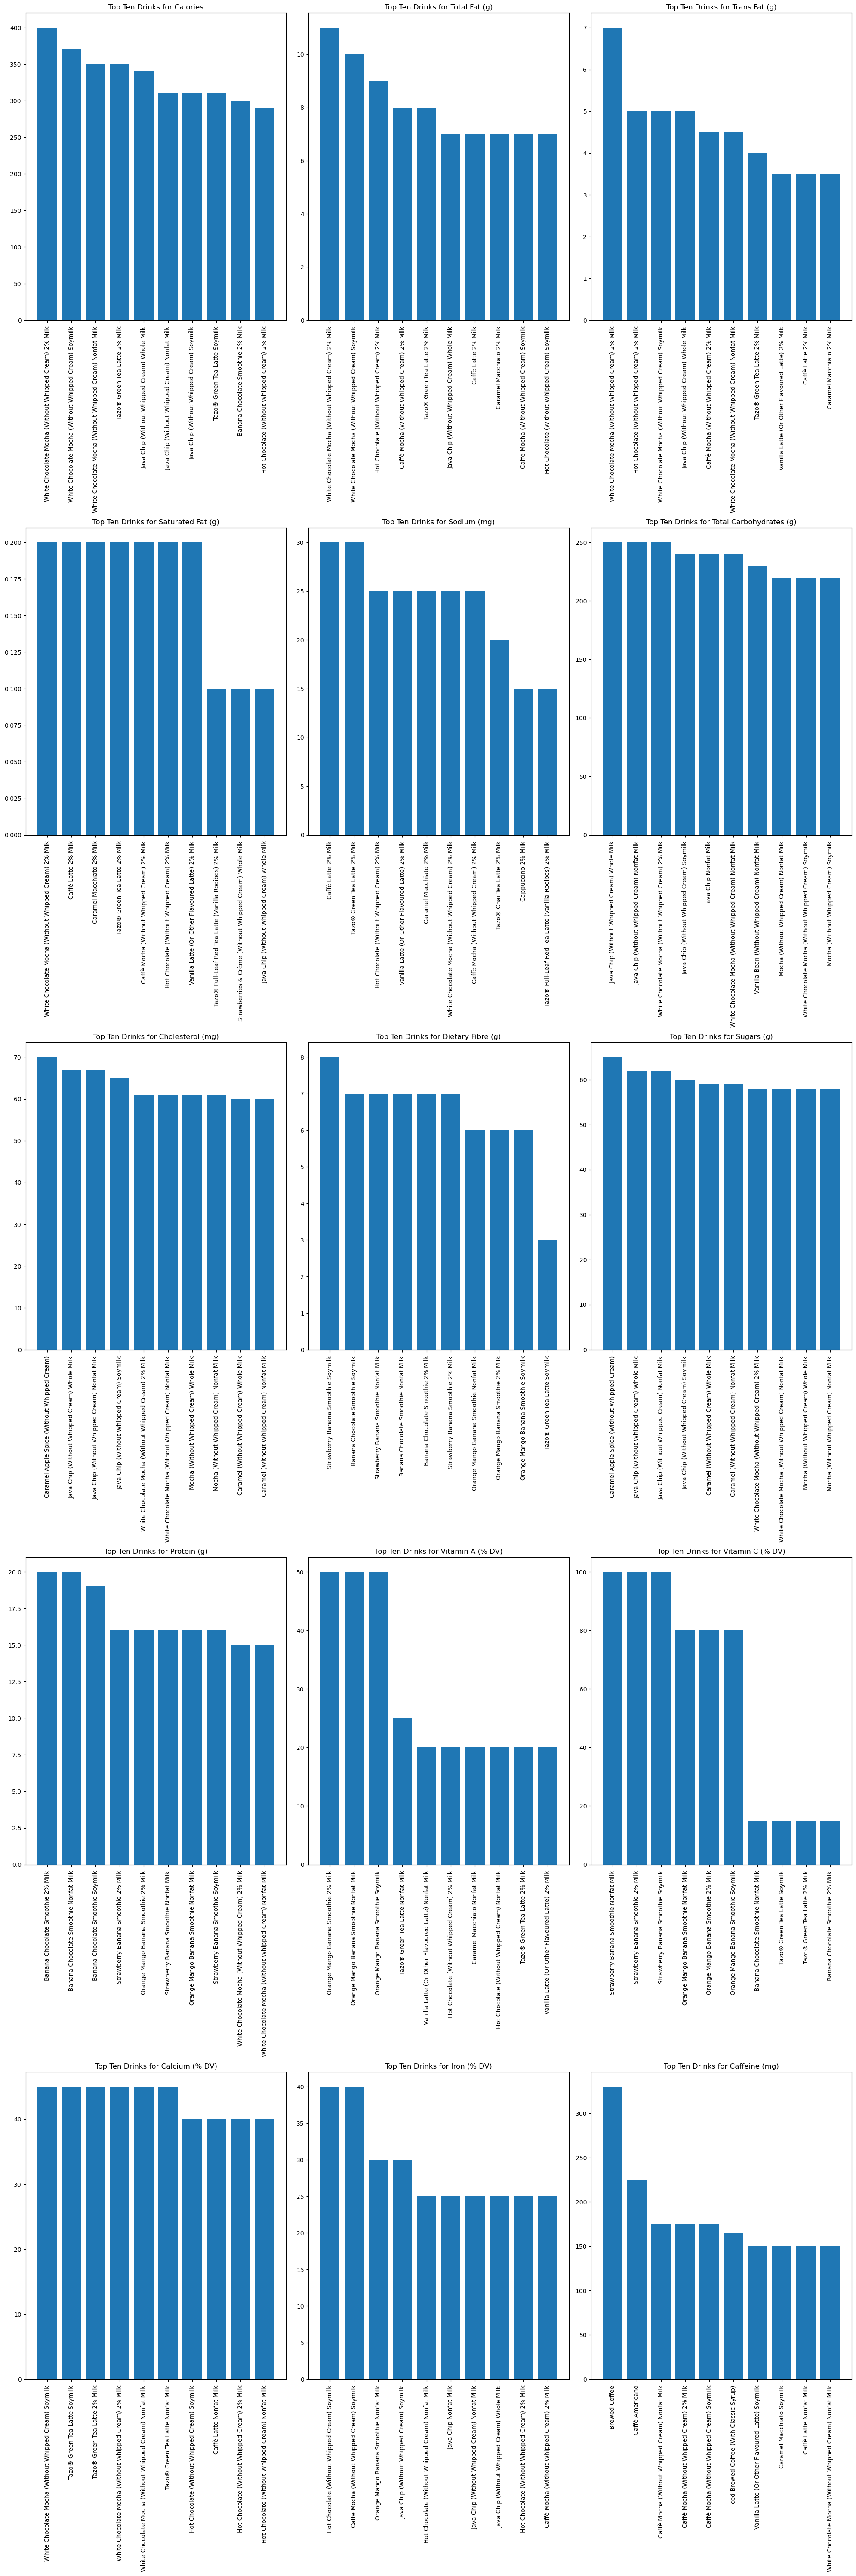

In [40]:
#Create a bar plot for each numerical feature with the top 10 drinks for that feature
num_cols = df_gr.select_dtypes(include='number').columns
count = 0

df_list=[]

fig, axes = plt.subplots(5, 3, figsize=(20, 60))
for i in range(5):
    for j in range(3):
        #create a mini df for each feature w/ top 10 items
        df_temp = df_gr.sort_values(num_cols[count], ascending=False)
        df_temp = df_temp.head(10)
        df_temp = df_temp[['Beverage', num_cols[count]]]
        print(df_temp.shape)
        #axes[0 , 0].
        #axes[i , j].df_temp.plot(kind='bar', x='Beverage', y='Calories')
        #sns.barplot(data=df_temp, x='Beverage', y=num_cols[count], ax=axes[i,j])
        axes[i, j].bar(df_temp['Beverage'], df_temp[num_cols[count]])
        axes[i,j].set_title(f'Top Ten Drinks for {num_cols[count]}')
        plt.setp(axes[i, j].xaxis.get_majorticklabels(), rotation=90)
        #axes[i, j].xticks(rotation=90)
        count = count + 1

plt.tight_layout()

Figures are hard to read. In the next section, bar plots will be generated manually and individually.

In [41]:
#Create top 10 df for each numerical feature
num_cols = df_gr.select_dtypes(include='number').columns

df_list=[]

for col in num_cols:
    #create a mini df for each feature w/ top 10 items
    df_temp = df_gr.sort_values(col, ascending=False)
    df_temp = df_temp.head(10)
    df_temp = df_temp[['Beverage_category', 'Beverage', col]]
    df_list.append(df_temp)

In [42]:
num_cols

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
       'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [43]:
len(num_cols)

15

In [44]:
df_list[0]

,Beverage_category,Beverage,Calories
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream) ...,400
82,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream) ...,370
80,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream) ...,350
125,Tazo® Tea Drinks,Tazo® Green Tea Latte 2% Milk,350
212,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream) Whole Milk,340
211,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream) Nonfat Milk,310
213,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream) Soymilk,310
126,Tazo® Tea Drinks,Tazo® Green Tea Latte Soymilk,310
173,Smoothies,Banana Chocolate Smoothie 2% Milk,300
93,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream) 2% Milk,290


In [45]:
unq = df_gr.Beverage_category.unique()
unq

array(['Classic Espresso Drinks', 'Coffee', 'Frappuccino® Blended Coffee',
       'Frappuccino® Blended Crème', 'Frappuccino® Light Blended Coffee',
       'Shaken Iced Beverages', 'Signature Espresso Drinks', 'Smoothies',
       'Tazo® Tea Drinks'], dtype=object)

In [46]:
#Set up a dictionary of colors assigned to each Beverage_category
colors = {unq[0]: 'orangered', unq[1]: 'gold', unq[2]: 'yellow', unq[3]: 'lawngreen', unq[4]: 'limegreen', unq[5]: 'turquoise', unq[6]: 'dodgerblue', unq[7]: 'mediumblue', unq[8]: 'fuchsia'}

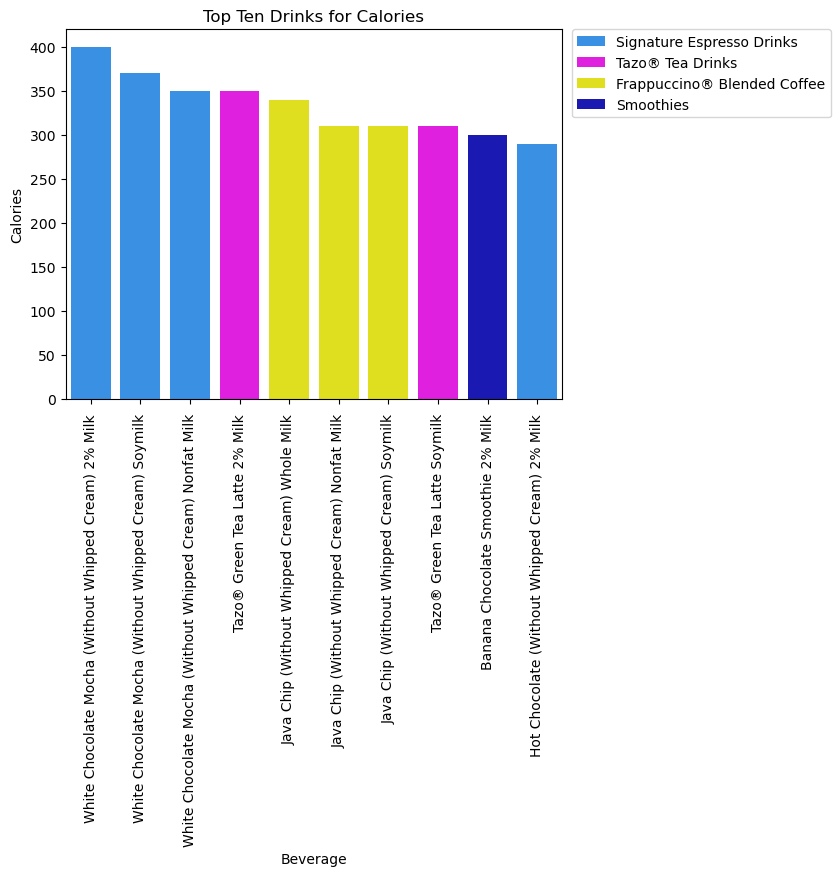

In [47]:
#Plot Top 10 Calories
sns.barplot(data=df_list[0], x='Beverage', y=num_cols[0], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[0]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenCalories.png', bbox_inches='tight')

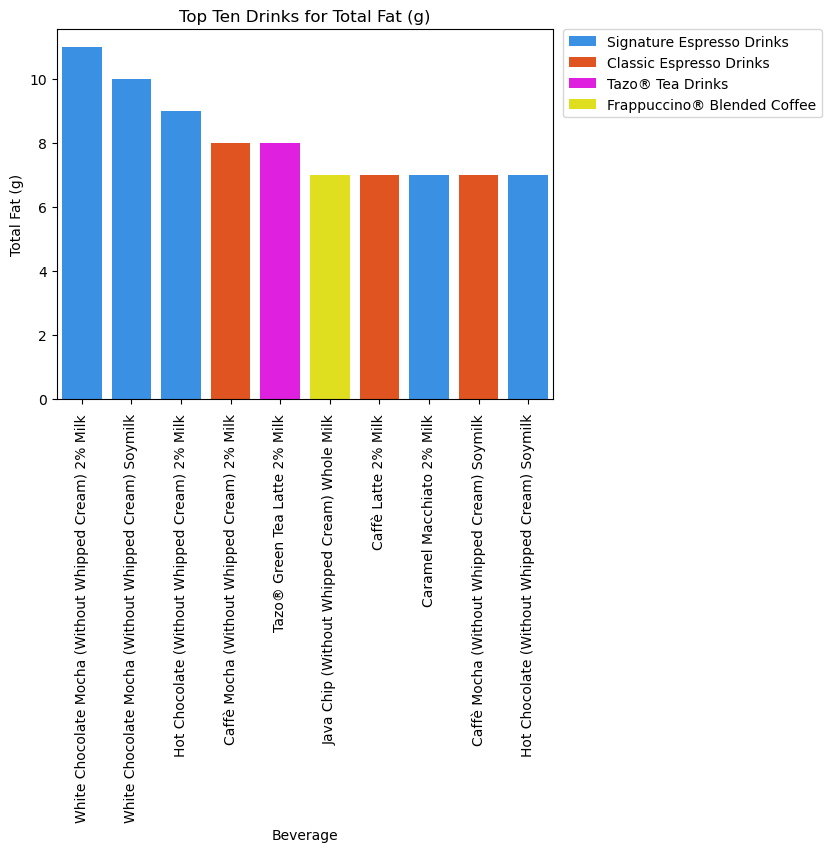

In [48]:
#Plot Top 10 Total Fat
sns.barplot(data=df_list[1], x='Beverage', y=num_cols[1], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[1]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenTotalFat.png', bbox_inches='tight')

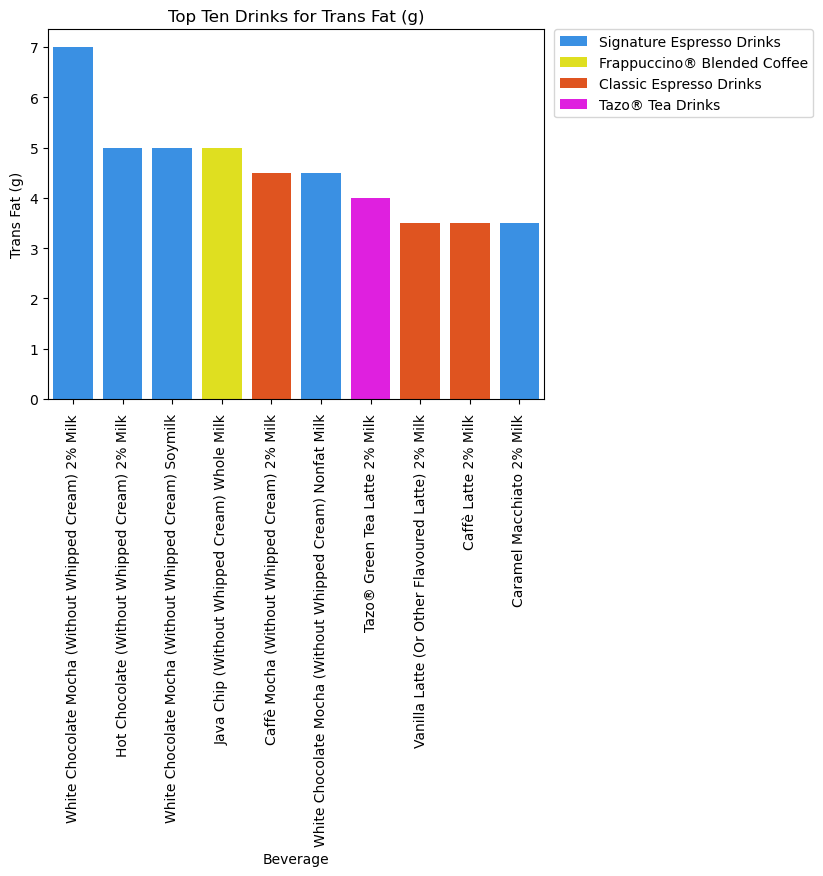

In [49]:
#Plot Top 10 Trans Fat

sns.barplot(data=df_list[2], x='Beverage', y=num_cols[2], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[2]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('03_TopTenTransFat.png', bbox_inches='tight')

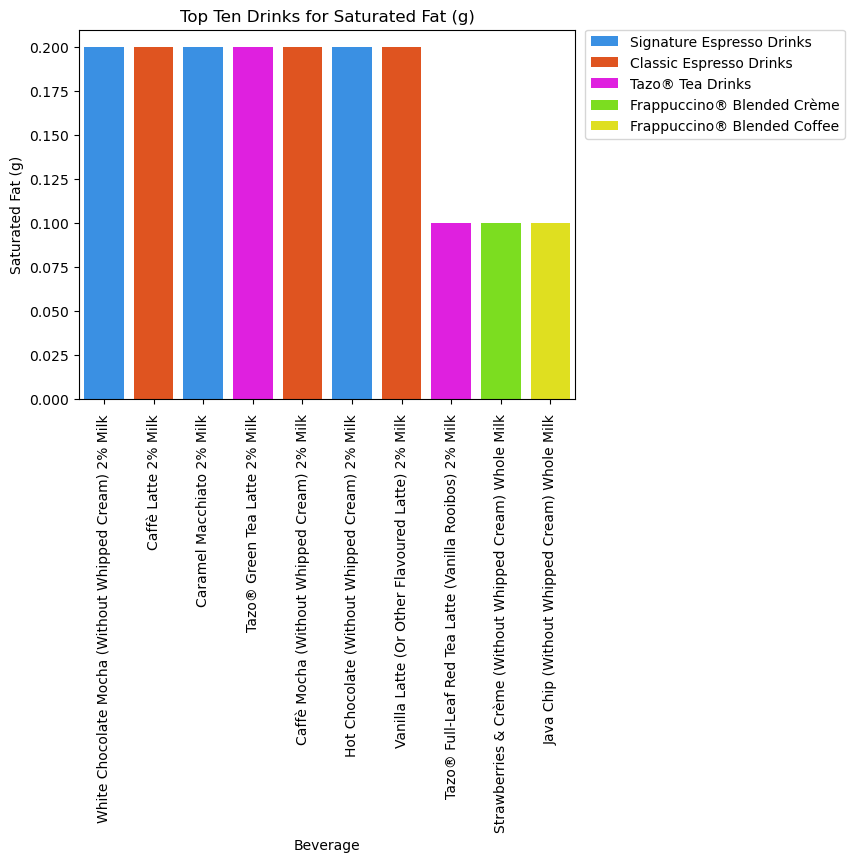

In [50]:
#Plot Top 10 Saturated Fat

sns.barplot(data=df_list[3], x='Beverage', y=num_cols[3], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[3]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenSatFat.png', bbox_inches='tight')

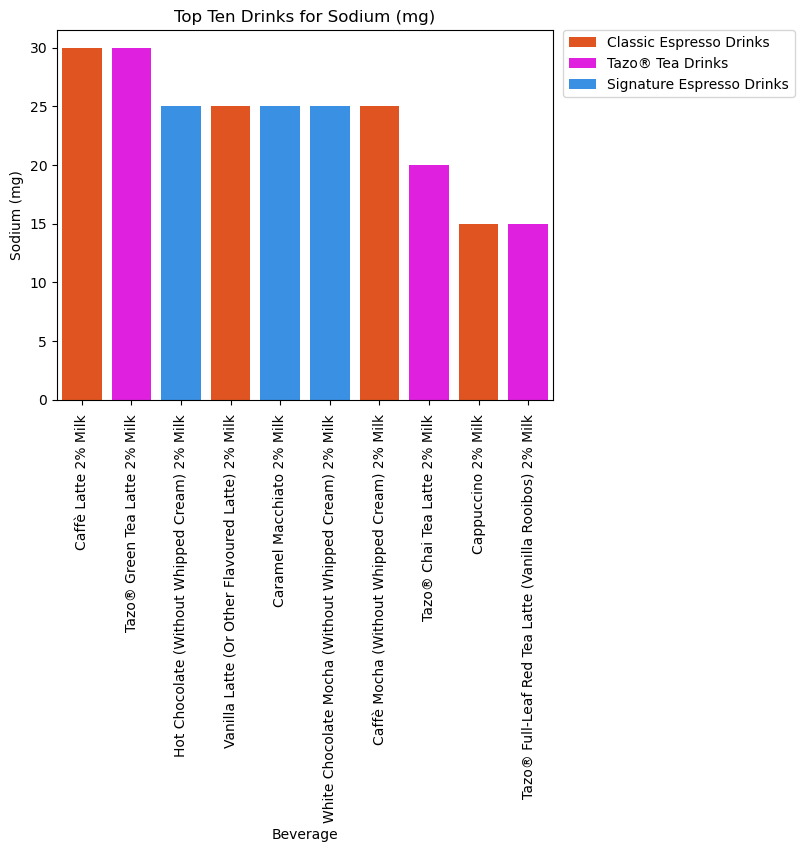

In [51]:
#Plot Top 10 Sodium

sns.barplot(data=df_list[4], x='Beverage', y=num_cols[4], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[4]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenSodium.png', bbox_inches='tight')

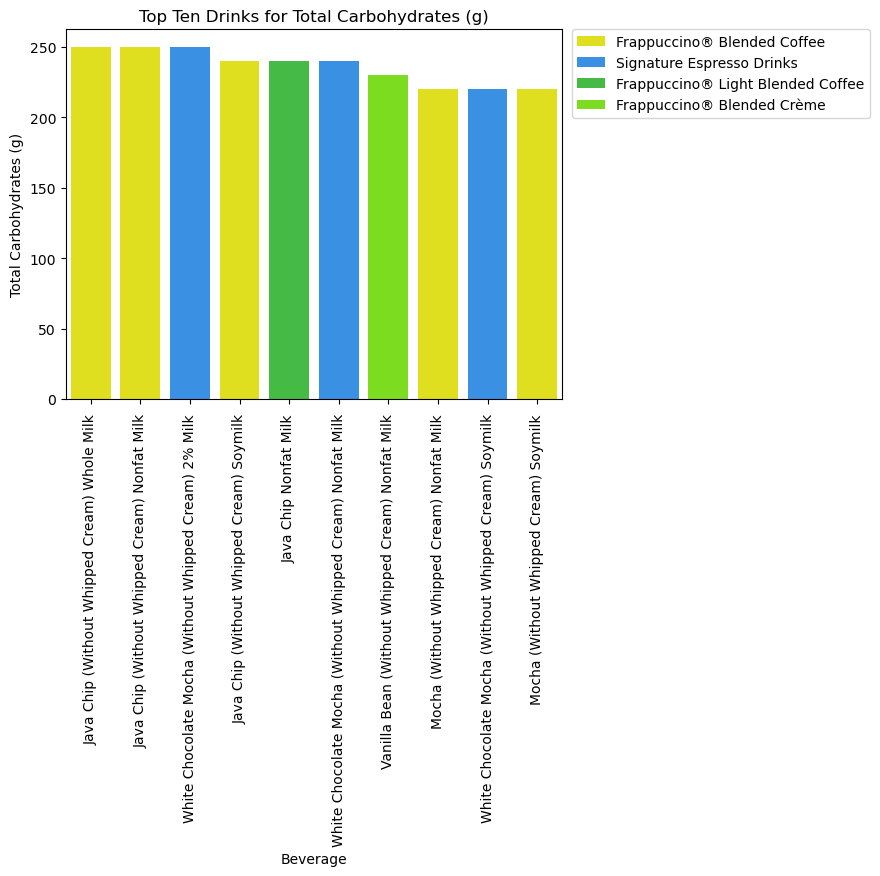

In [52]:
#Plot Top 10 Carbohydrates
sns.barplot(data=df_list[5], x='Beverage', y=num_cols[5], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[5]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenCarbohydrates.png', bbox_inches='tight')

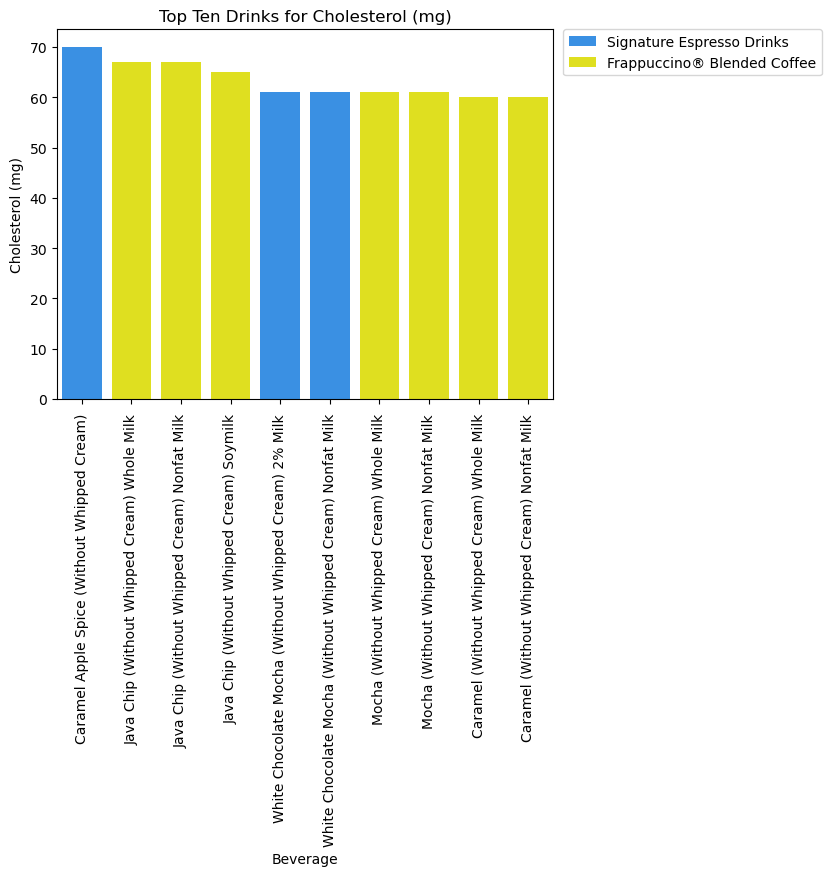

In [53]:
#Plot Top 10 Cholesterol

sns.barplot(data=df_list[6], x='Beverage', y=num_cols[6], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[6]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenCholesterol.png', bbox_inches='tight')

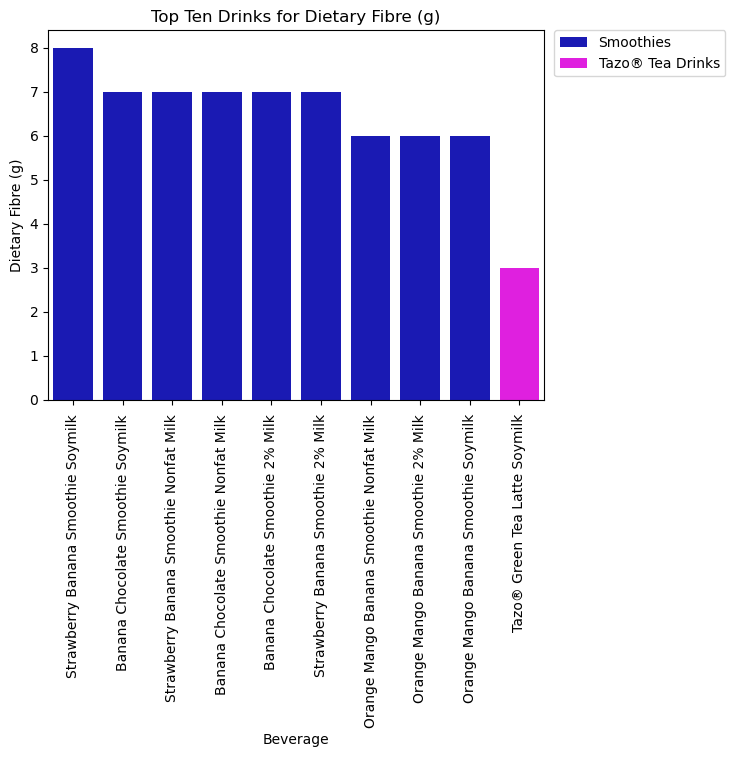

In [54]:
#Plot Top 10 Dietary Fibre

sns.barplot(data=df_list[7], x='Beverage', y=num_cols[7], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[7]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenDietaryFiber.png', bbox_inches='tight')

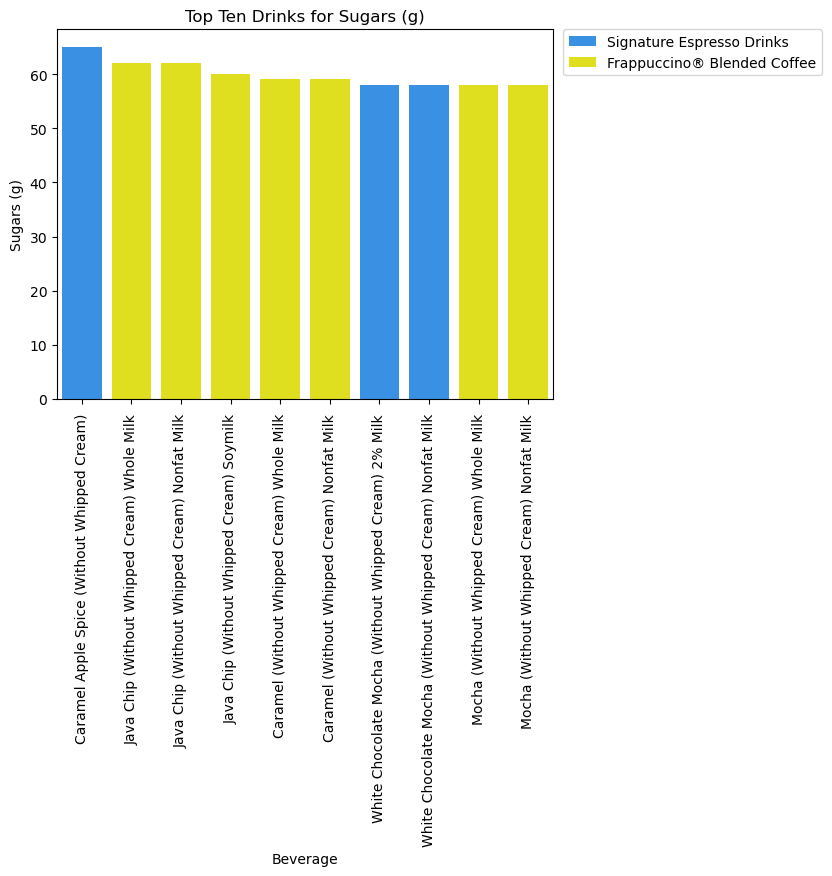

In [55]:
#Plot Top 10 Sugars

sns.barplot(data=df_list[8], x='Beverage', y=num_cols[8], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[8]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenSugars.png', bbox_inches='tight')

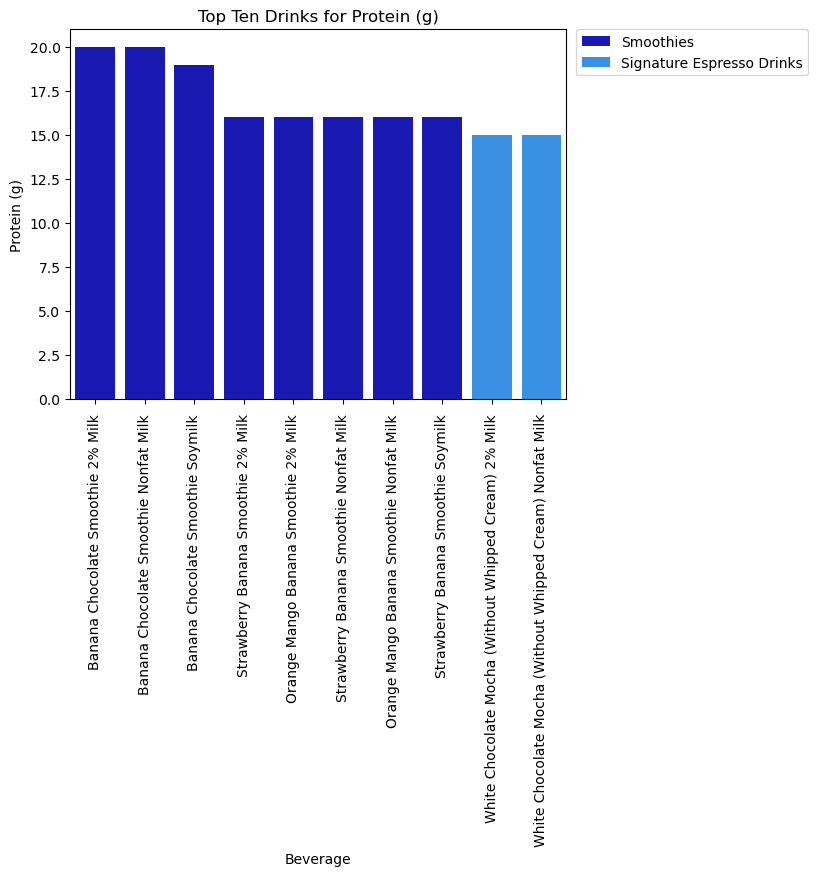

In [56]:
#Plot Top 10 Protein

sns.barplot(data=df_list[9], x='Beverage', y=num_cols[9], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[9]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenProtein.png', bbox_inches='tight')

In [57]:
num_cols

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
       'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

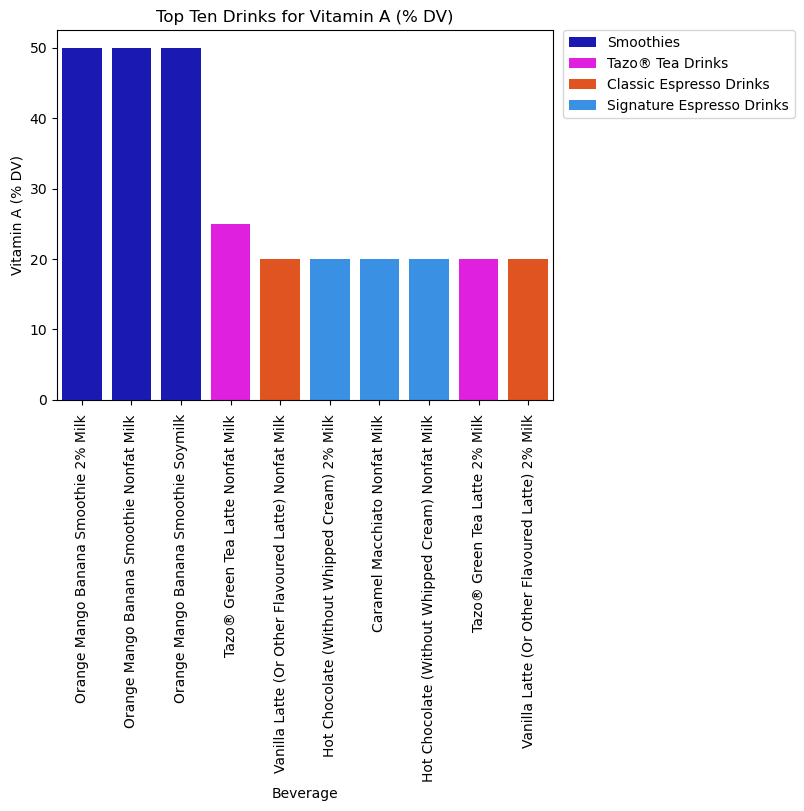

In [58]:
#Plot Top 10 VitaminA

sns.barplot(data=df_list[10], x='Beverage', y=num_cols[10], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[10]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenVitA.png', bbox_inches='tight')

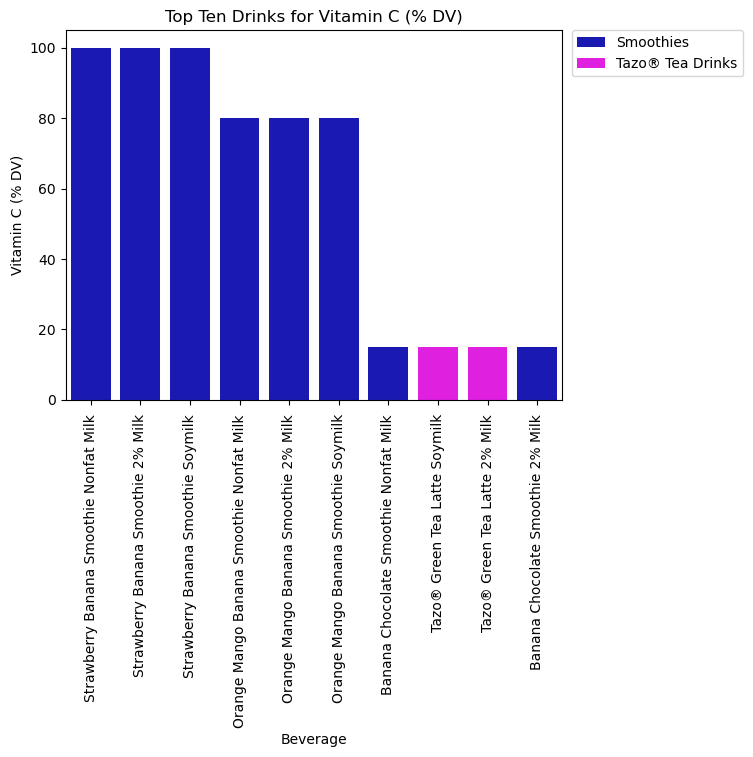

In [59]:
#Plot Top 10 VitC

sns.barplot(data=df_list[11], x='Beverage', y=num_cols[11], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[11]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenVitC.png', bbox_inches='tight')

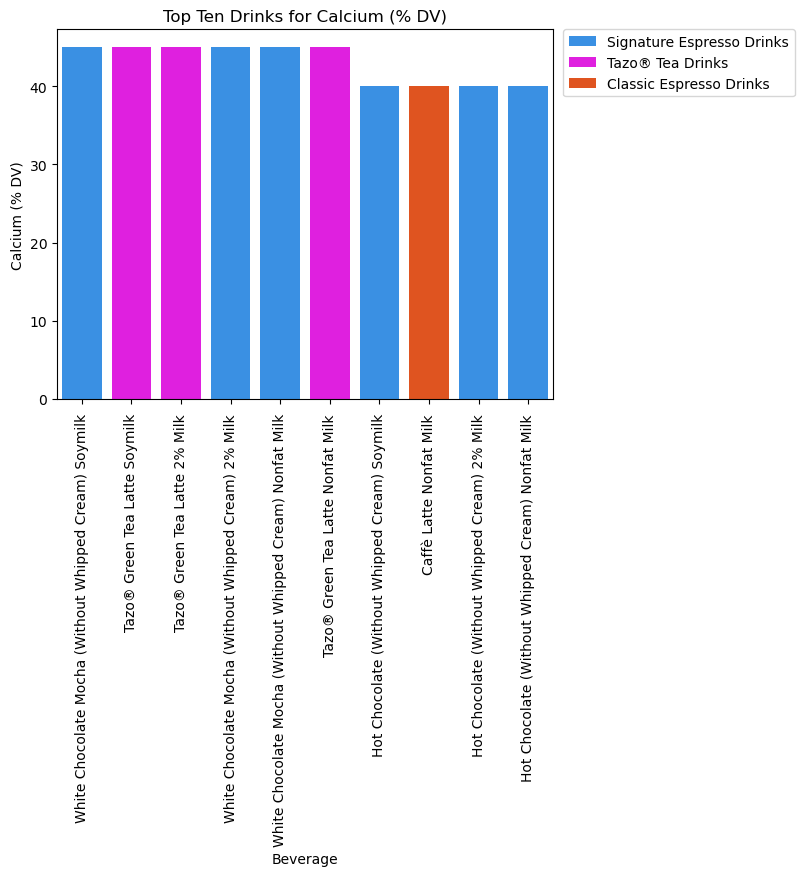

In [60]:
#Plot Top 10 Calcium

sns.barplot(data=df_list[12], x='Beverage', y=num_cols[12], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[12]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenCalcium.png', bbox_inches='tight')

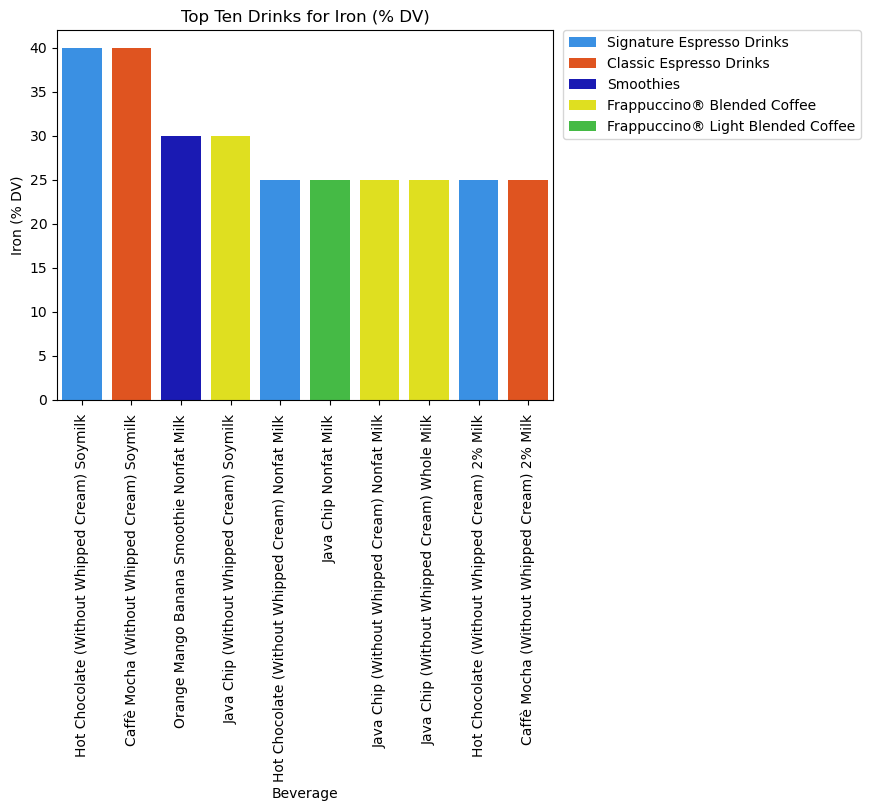

In [61]:
#Plot Top 10 Iron

sns.barplot(data=df_list[13], x='Beverage', y=num_cols[13], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[13]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenIron.png', bbox_inches='tight')

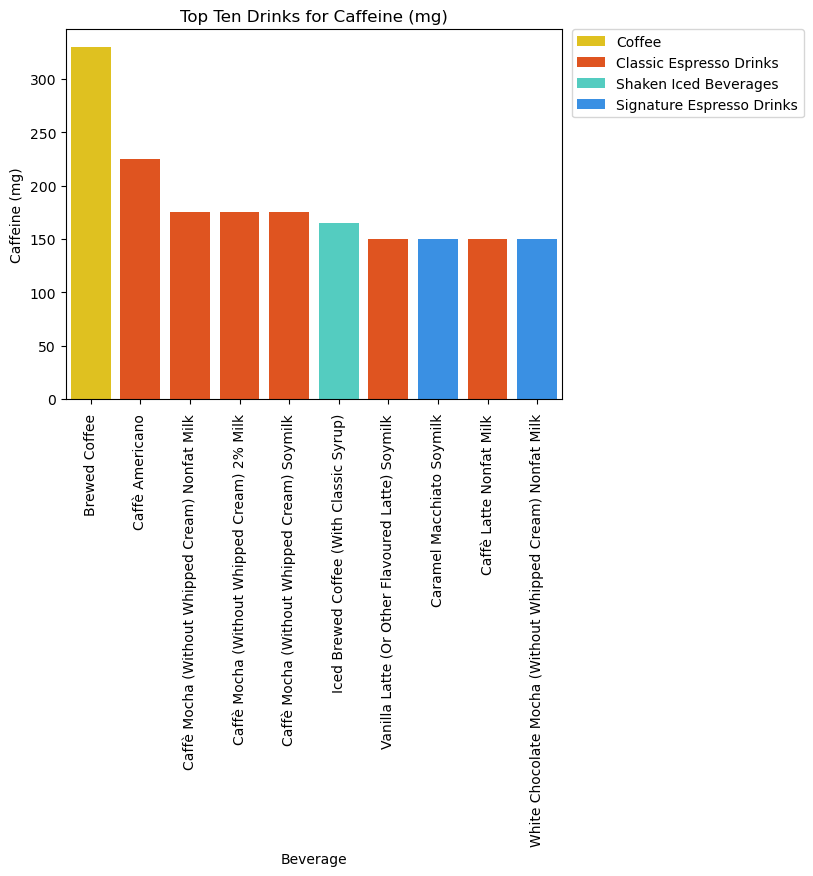

In [62]:
#Plot Top 10 Caffeine

sns.barplot(data=df_list[14], x='Beverage', y=num_cols[14], hue='Beverage_category', palette=colors)
plt.xticks(rotation=90)
plt.title(f'Top Ten Drinks for {num_cols[14]}')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('TopTenCaffeine.png', bbox_inches='tight')

## 2.2 Correlations<a id='2.2_Correlations'></a>

In [63]:
# plt.figure(figsize=(16, 16)) 
# sns.pairplot(df_gr)
# plt.savefig('starbucks_pairplot.png')

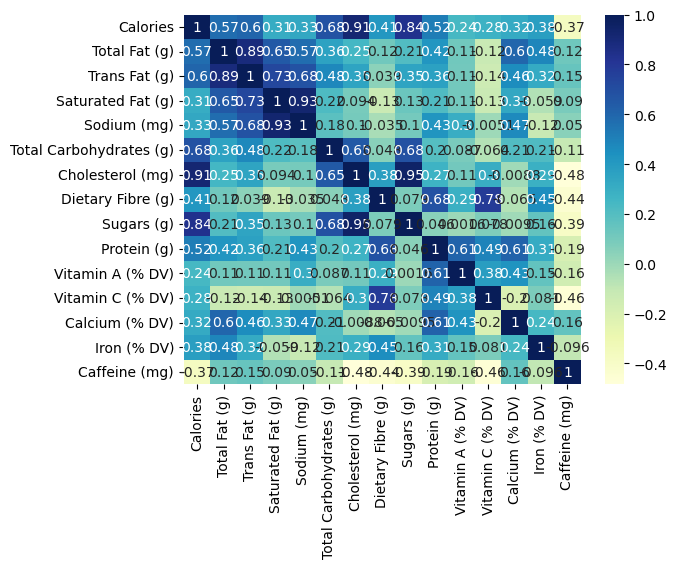

In [64]:
df_gr.corr(numeric_only=True)

# Plotting correlation heatmap
sns.heatmap(df_gr.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.savefig('StarbucksCorrHeatmap.png', bbox_inches='tight')

## 2.3 Healthy v. Unhealthy<a id='2.3_Healthy_Unhealthy'></a>

### 2.3.1 Scale the data<a id='2.3.1_Scale_the_data'></a>

In [65]:
#df_sized.set_index('Beverage', inplace=True)
df_gr.sort_index()
df_gr.head(10)

,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size
42,Classic Espresso Drinks,Caffè Americano,15,0.0,0.0,0.0,0,15,3,0,0,1.0,0,0,2,0.0,225,Grande
10,Classic Espresso Drinks,Caffè Latte Nonfat Milk,130,0.3,0.2,0.0,5,150,19,0,18,13.0,20,0,40,0.0,150,Grande
11,Classic Espresso Drinks,Caffè Latte 2% Milk,190,7.0,3.5,0.2,30,170,19,0,17,12.0,20,2,40,0.0,150,Grande
12,Classic Espresso Drinks,Caffè Latte Soymilk,150,5.0,0.5,0.0,0,130,13,1,8,10.0,15,0,40,15.0,150,Grande
22,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) Nonfat Milk,220,2.5,1.5,0.0,5,125,43,2,34,13.0,20,0,35,25.0,175,Grande
23,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) 2% Milk,260,8.0,4.5,0.2,25,140,42,2,34,13.0,15,2,35,25.0,175,Grande
24,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) Soymilk,230,7.0,2.0,0.0,0,105,37,3,26,11.0,10,0,35,40.0,175,Grande
50,Classic Espresso Drinks,Cappuccino Nonfat Milk,80,0.2,0.1,0.0,5,90,12,0,10,8.0,15,0,25,0.0,150,Grande
51,Classic Espresso Drinks,Cappuccino 2% Milk,120,4.0,2.0,0.1,15,100,12,0,10,8.0,10,0,25,0.0,150,Grande
52,Classic Espresso Drinks,Cappuccino Soymilk,100,3.5,0.4,0.0,0,80,9,1,5,7.0,8,0,25,10.0,150,Grande


In [66]:
df_gr.reset_index(drop=True, inplace=True)
df_gr.head()

,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size
0,Classic Espresso Drinks,Caffè Americano,15,0.0,0.0,0.0,0,15,3,0,0,1.0,0,0,2,0.0,225,Grande
1,Classic Espresso Drinks,Caffè Latte Nonfat Milk,130,0.3,0.2,0.0,5,150,19,0,18,13.0,20,0,40,0.0,150,Grande
2,Classic Espresso Drinks,Caffè Latte 2% Milk,190,7.0,3.5,0.2,30,170,19,0,17,12.0,20,2,40,0.0,150,Grande
3,Classic Espresso Drinks,Caffè Latte Soymilk,150,5.0,0.5,0.0,0,130,13,1,8,10.0,15,0,40,15.0,150,Grande
4,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) Nonfat Milk,220,2.5,1.5,0.0,5,125,43,2,34,13.0,20,0,35,25.0,175,Grande


In [67]:
numeric_cols = df_gr.select_dtypes(include='number').columns
string_cols = df_gr.select_dtypes(exclude='number').columns

# Create a new dataframe with only numeric columns"
df_numeric = df_gr[numeric_cols]
df_strings = df_gr[string_cols]

In [68]:
df_numeric.head(10)

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,15,0.0,0.0,0.0,0,15,3,0,0,1.0,0,0,2,0.0,225
1,130,0.3,0.2,0.0,5,150,19,0,18,13.0,20,0,40,0.0,150
2,190,7.0,3.5,0.2,30,170,19,0,17,12.0,20,2,40,0.0,150
3,150,5.0,0.5,0.0,0,130,13,1,8,10.0,15,0,40,15.0,150
4,220,2.5,1.5,0.0,5,125,43,2,34,13.0,20,0,35,25.0,175
5,260,8.0,4.5,0.2,25,140,42,2,34,13.0,15,2,35,25.0,175
6,230,7.0,2.0,0.0,0,105,37,3,26,11.0,10,0,35,40.0,175
7,80,0.2,0.1,0.0,5,90,12,0,10,8.0,15,0,25,0.0,150
8,120,4.0,2.0,0.1,15,100,12,0,10,8.0,10,0,25,0.0,150
9,100,3.5,0.4,0.0,0,80,9,1,5,7.0,8,0,25,10.0,150


In [69]:
df_strings.head(10)

,Beverage_category,Beverage,Size
0,Classic Espresso Drinks,Caffè Americano,Grande
1,Classic Espresso Drinks,Caffè Latte Nonfat Milk,Grande
2,Classic Espresso Drinks,Caffè Latte 2% Milk,Grande
3,Classic Espresso Drinks,Caffè Latte Soymilk,Grande
4,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) Nonfat Milk,Grande
5,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) 2% Milk,Grande
6,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) Soymilk,Grande
7,Classic Espresso Drinks,Cappuccino Nonfat Milk,Grande
8,Classic Espresso Drinks,Cappuccino 2% Milk,Grande
9,Classic Espresso Drinks,Cappuccino Soymilk,Grande


In [70]:
df_numeric.isnull().sum().sort_values(ascending=False)

Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              0
dtype: int64

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)

In [72]:
# Convert the scaled array back to a dataframe
df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns=numeric_cols)
df_numeric_scaled.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,0.0375,0.000000,0.000000,0.0,0.000000,0.06,0.042857,0.000,0.000000,0.05,0.0,0.00,0.044444,0.000,0.681818
1,0.3250,0.027273,0.028571,0.0,0.166667,0.60,0.271429,0.000,0.276923,0.65,0.4,0.00,0.888889,0.000,0.454545
2,0.4750,0.636364,0.500000,1.0,1.000000,0.68,0.271429,0.000,0.261538,0.60,0.4,0.02,0.888889,0.000,0.454545
3,0.3750,0.454545,0.071429,0.0,0.000000,0.52,0.185714,0.125,0.123077,0.50,0.3,0.00,0.888889,0.375,0.454545
4,0.5500,0.227273,0.214286,0.0,0.166667,0.50,0.614286,0.250,0.523077,0.65,0.4,0.00,0.777778,0.625,0.530303


In [73]:
df_temp = df_gr[string_cols]
df_temp

,Beverage_category,Beverage,Size
0,Classic Espresso Drinks,Caffè Americano,Grande
1,Classic Espresso Drinks,Caffè Latte Nonfat Milk,Grande
2,Classic Espresso Drinks,Caffè Latte 2% Milk,Grande
3,Classic Espresso Drinks,Caffè Latte Soymilk,Grande
4,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) Nonfat Milk,Grande
...,...,...,...
68,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte Soymilk,Grande
69,Tazo® Tea Drinks,Tazo® Green Tea Latte Nonfat Milk,Grande
70,Tazo® Tea Drinks,Tazo® Green Tea Latte 2% Milk,Grande
71,Tazo® Tea Drinks,Tazo® Green Tea Latte Soymilk,Grande


In [74]:
# Combine the scaled numeric data with the original string columns
df_scaled = pd.concat([df_numeric_scaled, df_temp], axis=1)
df_scaled.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Beverage_category,Beverage,Size
0,0.0375,0.000000,0.000000,0.0,0.000000,0.06,0.042857,0.000,0.000000,0.05,0.0,0.00,0.044444,0.000,0.681818,Classic Espresso Drinks,Caffè Americano,Grande
1,0.3250,0.027273,0.028571,0.0,0.166667,0.60,0.271429,0.000,0.276923,0.65,0.4,0.00,0.888889,0.000,0.454545,Classic Espresso Drinks,Caffè Latte Nonfat Milk,Grande
2,0.4750,0.636364,0.500000,1.0,1.000000,0.68,0.271429,0.000,0.261538,0.60,0.4,0.02,0.888889,0.000,0.454545,Classic Espresso Drinks,Caffè Latte 2% Milk,Grande
3,0.3750,0.454545,0.071429,0.0,0.000000,0.52,0.185714,0.125,0.123077,0.50,0.3,0.00,0.888889,0.375,0.454545,Classic Espresso Drinks,Caffè Latte Soymilk,Grande
4,0.5500,0.227273,0.214286,0.0,0.166667,0.50,0.614286,0.250,0.523077,0.65,0.4,0.00,0.777778,0.625,0.530303,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream) Nonfat Milk,Grande


In [75]:
df_scaled.sort_values('Calories', ascending=False)

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Beverage_category,Beverage,Size
49,1.0000,1.000000,1.000000,1.0,0.833333,1.00,0.871429,0.000,0.892308,0.75,0.30,0.02,1.000000,0.000,0.454545,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream) ...,Grande
50,0.9250,0.909091,0.714286,0.0,0.000000,0.88,0.800000,0.125,0.784615,0.65,0.20,0.02,1.000000,0.375,0.454545,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream) ...,Grande
48,0.8750,0.545455,0.642857,0.0,0.333333,0.96,0.871429,0.000,0.892308,0.75,0.40,0.02,1.000000,0.050,0.454545,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream) ...,Grande
70,0.8750,0.727273,0.571429,1.0,1.000000,0.72,0.814286,0.125,0.846154,0.70,0.40,0.15,1.000000,0.100,0.242424,Tazo® Tea Drinks,Tazo® Green Tea Latte 2% Milk,Grande
22,0.8500,0.636364,0.714286,0.5,0.333333,1.00,0.957143,0.250,0.953846,0.25,0.08,0.00,0.222222,0.625,0.333333,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream) Whole Milk,Grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,0.2000,0.000000,0.000000,0.0,0.000000,0.00,0.300000,0.000,0.323077,0.00,0.00,0.00,0.000000,0.000,0.269697,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande
7,0.2000,0.018182,0.014286,0.0,0.166667,0.36,0.171429,0.000,0.153846,0.40,0.30,0.00,0.555556,0.000,0.454545,Classic Espresso Drinks,Cappuccino Nonfat Milk,Grande
0,0.0375,0.000000,0.000000,0.0,0.000000,0.06,0.042857,0.000,0.000000,0.05,0.00,0.00,0.044444,0.000,0.681818,Classic Espresso Drinks,Caffè Americano,Grande
14,0.0125,0.009091,0.000000,0.0,0.000000,0.04,0.000000,0.000,0.000000,0.05,0.00,0.00,0.000000,0.000,1.000000,Coffee,Brewed Coffee,Grande


In [76]:
df_scaled.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
       'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)',
       'Beverage_category', 'Beverage', 'Size'],
      dtype='object')

In [77]:
df_scaled.drop(columns='Size', inplace=True)

### 2.3.2 Define which columns are "healthy", "unhealthy" or "neither"<a id='2.3.2_Define_which'></a>

In [78]:
unhealth_col = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',  'Cholesterol (mg)', 'Sugars (g)']
health_col = ['Dietary Fibre (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
neither_col = ['Total Carbohydrates (g)', 'Caffeine (mg)', 'Beverage_category']

In [79]:
#Get healthy and unhealthy scores by totaling up the healthy or unhealthy columns
df_scaled['unhealthy'] = df_scaled[unhealth_col].sum(axis=1)
df_scaled['healthy'] = df_scaled[health_col].sum(axis=1)

In [80]:
df_scaled.sort_values('Calories', ascending=False)

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Beverage_category,Beverage,unhealthy,healthy
49,1.0000,1.000000,1.000000,1.0,0.833333,1.00,0.871429,0.000,0.892308,0.75,0.30,0.02,1.000000,0.000,0.454545,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream) ...,6.597070,2.070000
50,0.9250,0.909091,0.714286,0.0,0.000000,0.88,0.800000,0.125,0.784615,0.65,0.20,0.02,1.000000,0.375,0.454545,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream) ...,4.132992,2.370000
48,0.8750,0.545455,0.642857,0.0,0.333333,0.96,0.871429,0.000,0.892308,0.75,0.40,0.02,1.000000,0.050,0.454545,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream) ...,4.160381,2.220000
70,0.8750,0.727273,0.571429,1.0,1.000000,0.72,0.814286,0.125,0.846154,0.70,0.40,0.15,1.000000,0.100,0.242424,Tazo® Tea Drinks,Tazo® Green Tea Latte 2% Milk,5.834141,2.475000
22,0.8500,0.636364,0.714286,0.5,0.333333,1.00,0.957143,0.250,0.953846,0.25,0.08,0.00,0.222222,0.625,0.333333,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream) Whole Milk,4.944972,1.427222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,0.2000,0.000000,0.000000,0.0,0.000000,0.00,0.300000,0.000,0.323077,0.00,0.00,0.00,0.000000,0.000,0.269697,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),0.823077,0.000000
7,0.2000,0.018182,0.014286,0.0,0.166667,0.36,0.171429,0.000,0.153846,0.40,0.30,0.00,0.555556,0.000,0.454545,Classic Espresso Drinks,Cappuccino Nonfat Milk,0.724409,1.255556
0,0.0375,0.000000,0.000000,0.0,0.000000,0.06,0.042857,0.000,0.000000,0.05,0.00,0.00,0.044444,0.000,0.681818,Classic Espresso Drinks,Caffè Americano,0.080357,0.094444
14,0.0125,0.009091,0.000000,0.0,0.000000,0.04,0.000000,0.000,0.000000,0.05,0.00,0.00,0.000000,0.000,1.000000,Coffee,Brewed Coffee,0.021591,0.050000


### 2.3.3 Get top 10 unhealthy drinks<a id='2.3.3_Top_10_unhealthy'></a>

In [81]:
cols = health_col + neither_col + ['healthy']
df_unhealthy = df_scaled.drop(columns=cols)
df_unhealthy.sort_values(by='unhealthy', ascending=False, inplace=True)
df_unhealthy = df_unhealthy.head(10)
df_unhealthy.drop(columns='unhealthy', inplace=True)
df_unhealthy.set_index('Beverage', inplace=True)
df_unhealthy

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Cholesterol (mg),Sugars (g)
Beverage,,,,,,,
White Chocolate Mocha (Without Whipped Cream) 2% Milk,1.000,1.000000,1.000000,1.0,0.833333,0.871429,0.892308
Tazo® Green Tea Latte 2% Milk,0.875,0.727273,0.571429,1.0,1.000000,0.814286,0.846154
Hot Chocolate (Without Whipped Cream) 2% Milk,0.725,0.818182,0.714286,1.0,0.833333,0.671429,0.630769
Caffè Mocha (Without Whipped Cream) 2% Milk,0.650,0.727273,0.642857,1.0,0.833333,0.600000,0.523077
Java Chip (Without Whipped Cream) Whole Milk,0.850,0.636364,0.714286,0.5,0.333333,0.957143,0.953846
Vanilla Latte (Or Other Flavoured Latte) 2% Milk,0.625,0.545455,0.500000,1.0,0.833333,0.528571,0.538462
Caramel Macchiato 2% Milk,0.600,0.636364,0.500000,1.0,0.833333,0.485714,0.492308
White Chocolate Mocha (Without Whipped Cream) Nonfat Milk,0.875,0.545455,0.642857,0.0,0.333333,0.871429,0.892308
Caffè Latte 2% Milk,0.475,0.636364,0.500000,1.0,1.000000,0.271429,0.261538


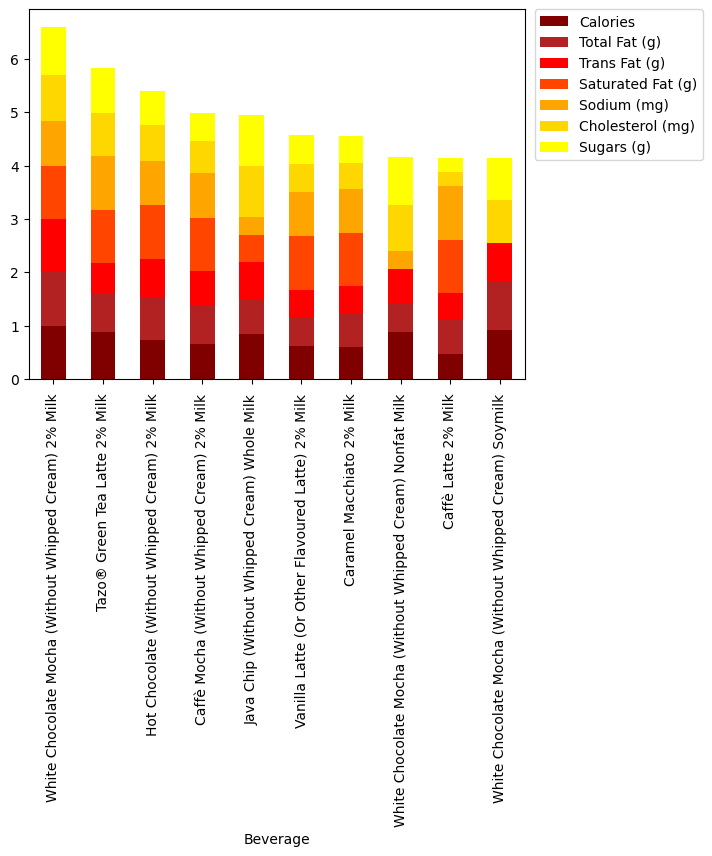

In [82]:
# create stacked bar chart for monthly temperatures
df_unhealthy.plot(kind='bar', stacked=True, color=['maroon', 'firebrick', 'red', 'orangered', 'orange', 'gold', 'yellow'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('Unhealthy.png', bbox_inches='tight')

### 2.3.4 Get top 10 healthy drinks<a id='2.3.3_Top_10_healthy'></a>

In [83]:
cols = unhealth_col + neither_col + ['unhealthy']
df_healthy = df_scaled.drop(columns=cols)
df_healthy.sort_values(by='healthy', ascending=False, inplace=True)
df_healthy = df_healthy.head(10)
df_healthy.drop(columns='healthy', inplace=True)
df_healthy.set_index('Beverage', inplace=True)
df_healthy

,Dietary Fibre (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
Beverage,,,,,,
Orange Mango Banana Smoothie Nonfat Milk,0.750,0.80,1.00,0.80,0.222222,0.750
Orange Mango Banana Smoothie 2% Milk,0.750,0.80,1.00,0.80,0.222222,0.150
Orange Mango Banana Smoothie Soymilk,0.750,0.75,1.00,0.80,0.222222,0.150
Strawberry Banana Smoothie Soymilk,1.000,0.80,0.04,1.00,0.222222,0.200
Strawberry Banana Smoothie 2% Milk,0.875,0.80,0.08,1.00,0.222222,0.200
Strawberry Banana Smoothie Nonfat Milk,0.875,0.80,0.08,1.00,0.222222,0.200
Hot Chocolate (Without Whipped Cream) Soymilk,0.375,0.60,0.30,0.00,0.888889,1.000
Banana Chocolate Smoothie 2% Milk,0.875,1.00,0.16,0.15,0.444444,0.500
Banana Chocolate Smoothie Soymilk,0.875,0.95,0.12,0.15,0.444444,0.500


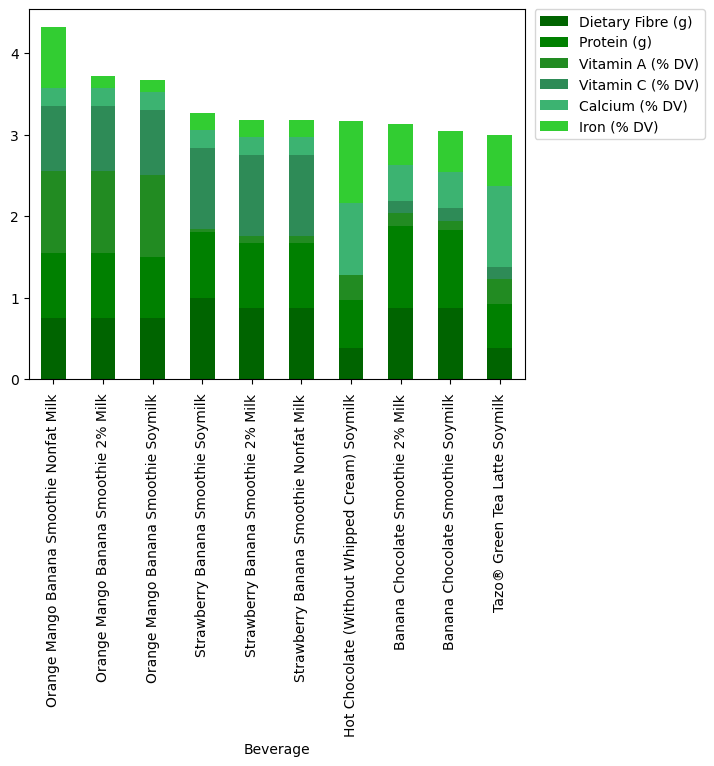

In [84]:
# create stacked bar chart for monthly temperatures
df_healthy.plot(kind='bar', stacked=True, color=['darkgreen', 'green', 'forestgreen', 'seagreen', 'mediumseagreen', 'limegreen'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('Healthy.png', bbox_inches='tight')

# 3.0 Conclusions<a id='3.0_Conclusions'></a>

This study aimed to determine which Starbucks drinks are the most and least healthy.

There’s a strong positive linear correlation between sugars and cholesterol which is interesting and somewhat unexpected, and a positive linear correlation between calories and cholesterol, total and trans fat, carbohydrates, sugars and protein, which makes sense since more calories generally means more protein, fat and carbohydrates.

Looking first at Calories: this category was dominated by White Chocolate Mocha and JavaChip, but also includes two of the Tazo  Green Tea Lattes which is surprising, and if given more time, would be worth checking on in order to make sure the data was correct. It was also surprising that a Smoothie made the top ten in Calories, although it is the Banana Chocolate Smoothie with 2% Milk, so maybe that's not so unusual.

Most of the other categories had a mixture of drink types, but Frappucinos dominate carbohydrates and cholesterol and 
Smoothiesdominatet Vitamin C and Dietary Fibe.r.Given that Starbucks at least started as a coffee store, it's worthwhile seeing which drinks offer the most caffeine. In this case it is mostly the lar basic coffee offerings like Brewed coffee, Cafe Americano, and Iced Brewed cofthat offer the most caffeine, although ith Caffe Mocare has also in the running.

In terms of the unhealthy drds of White Chocolate  of all kindsMochas (2%, Nonfat and Soymilk) made the top 10, but a Tazo Green Tea Latte with 2% Milnumber two,no. 2, which, again merits further investigation. The rankings are largely based on the combination othree the 3 types , even though Trans Fat and Saturated Fat are subsets of Total Fatof fat. If the study was redone, it would be best to remove the Trans and SatuFat categories fats, to avoid double count
In terms of healthy drinks, these are mostly the smoothies, although the hot chocolate due to amounts of iron, protein and dietary fiber.

So, the conclusions are much as we expect, stick to the smoothies if you want a healthier option at Starbucks.n
ing. 
